# REGRESSION ASSIGNMENT

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat

## DATA IMPORT

In [ ]:
df = pd.read_csv("train.csv")
df

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.0,43.0,1.0,19.0,29.0,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.000
1,21,77.0,115.0,31.0,74.0,10.0,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.000
2,21,86.0,141.0,9.0,43.0,198.0,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.000
3,11,NaN,NaN,NaN,NaN,20.0,14.2,1015.2,0.0,ESE,1.9,29-Oct-2015,1222.923
4,0,77.0,57.0,41.0,48.0,16.0,-1.0,1024.2,0.0,SSW,1.3,7-Feb-2015,1300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,18,17.0,17.0,3.0,27.0,154.0,31.6,991.9,0.0,E,1.7,10-Aug-2015,400.000
13996,13,114.0,114.0,5.0,39.0,19.0,1.0,1012.0,0.1,ESE,2.8,20-Feb-2016,1600.000
13997,9,32.0,67.0,7.0,79.0,2.0,-1.3,1027.7,0.0,ENE,1.2,24-Nov-2017,1700.000
13998,4,77.0,77.0,2.0,50.0,20.0,21.3,1007.7,0.0,E,0.0,1-Sep-2015,1000.000


In [ ]:
#There was a wrong date as 2017 is not a leap year
df = df.replace('29-Feb-2017','1-Mar-2017')
#as most of the measurings in that wrong date seem reasonably real and not
#artifacts, it was assumed that the acquisition system wrongly interpreted 
#a 1st of March as a 29th of February

## NaN CHECK

In [ ]:
#Check for subjects with at least one NaN
NA = pd.DataFrame((df.transpose().isna().sum())/(df.transpose().isna().sum()))
NA1 = NA.fillna(0)
NA1.sum()

0    774.0
dtype: float64

The number of NaN subjects is around the 5.52% of the total subject, so a drop of NaN shouldn't cause a significant biasing.

In [ ]:
data = df.dropna()

## CATEGORICAL VARIABLES ENCODING

In [ ]:
#The date field is ordinable with respect to the day, month and year
#progression.
Q = data["date"].str.split("-", n = 2, expand = True)
Q.columns = ['day','month','year']
dic = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
Q = Q.replace({"month": dic})
Q.day = pd.to_numeric(Q.day)
Q.year = pd.to_numeric(Q.year)
Q

,day,month,year
0,23,10,2014
1,9,1,2016
2,11,7,2016
4,7,2,2015
6,20,7,2016
...,...,...,...
13995,10,8,2015
13996,20,2,2016
13997,24,11,2017
13998,1,9,2015


In [ ]:
#Here the categorical "date" attribute is substituted with the encoded
#attributes "day", "month" and "year"
data1 = data.drop('date',axis=1)
data1['day']=Q.day
data1['month']=Q.month
data1['year']=Q.year
data1

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,carb_monox,day,month,year
0,23,13.0,43.0,1.0,19.0,29.0,7.6,1021.3,0.0,NNW,2.5,200.0,23,10,2014
1,21,77.0,115.0,31.0,74.0,10.0,0.0,1015.0,0.0,W,0.7,2100.0,9,1,2016
2,21,86.0,141.0,9.0,43.0,198.0,29.3,1000.9,0.0,SSE,0.4,700.0,11,7,2016
4,0,77.0,57.0,41.0,48.0,16.0,-1.0,1024.2,0.0,SSW,1.3,1300.0,7,2,2015
6,19,104.0,104.0,2.0,18.0,158.0,27.4,996.8,0.0,E,1.3,800.0,20,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,18,17.0,17.0,3.0,27.0,154.0,31.6,991.9,0.0,E,1.7,400.0,10,8,2015
13996,13,114.0,114.0,5.0,39.0,19.0,1.0,1012.0,0.1,ESE,2.8,1600.0,20,2,2016
13997,9,32.0,67.0,7.0,79.0,2.0,-1.3,1027.7,0.0,ENE,1.2,1700.0,24,11,2017
13998,4,77.0,77.0,2.0,50.0,20.0,21.3,1007.7,0.0,E,0.0,1000.0,1,9,2015


In [ ]:
data1.wind.unique()

array(['NNW', 'W', 'SSE', 'SSW', 'E', 'NE', 'WNW', 'N', 'SW', 'WSW', 'NW',
       'SE', 'NNE', 'ENE', 'S', 'ESE'], dtype=object)

In [ ]:
#data2 = pd.get_dummies(data1, prefix='wind')
#data2

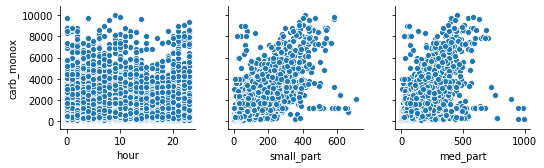

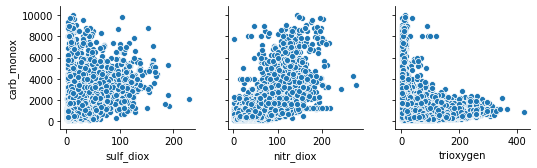

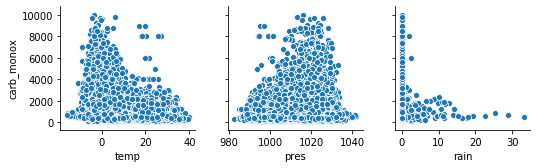

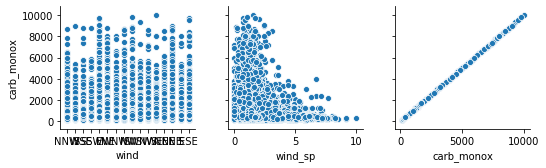

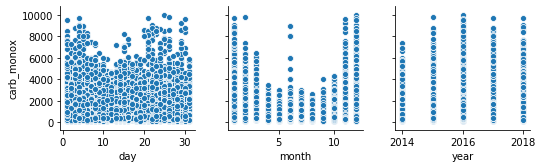

In [ ]:
%matplotlib inline
import seaborn as sns
sns.pairplot(data1, x_vars=data1.columns[0:3], y_vars='carb_monox')
sns.pairplot(data1, x_vars=data1.columns[3:6], y_vars='carb_monox')
sns.pairplot(data1, x_vars=data1.columns[6:9], y_vars='carb_monox')
sns.pairplot(data1, x_vars=data1.columns[9:12], y_vars='carb_monox')
sns.pairplot(data1, x_vars=data1.columns[12:15], y_vars='carb_monox')

We can observe the fact that wind, hour and day don't have a specific trend with respect to carb_monox; year remains pretty much constant.

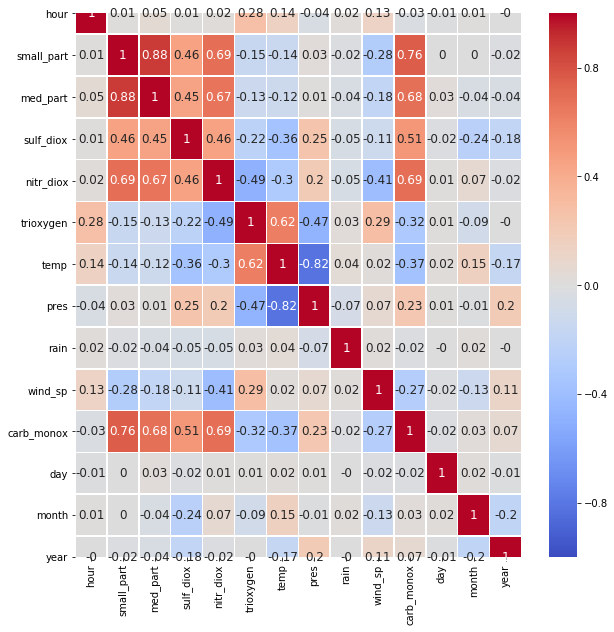

In [ ]:
#Correlation between numerical variables is checked in this heatmap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=data1.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12}, vmin=-1, vmax=1)
plt.show()

We can observe a very high negative correlation between pressure and rain (as physically expected); the 2 parameters carry the same information. Same reasoning for small_part and med_part, because they are highly positively correlated.

In [ ]:
#It was chosen to drop the 'wind' attribute as trough the scatterplots 
#no specific relation with "carb_monox" could be seen

datareg = data1.drop('wind', axis=1)

#multicollinear variables (as 'pres' and 'temp', or 'small_part' and 'med_part')
#were not dropped as linear regression didn't perform well and the other
#models solve multicollinearity issues in an automatized way

# STANDARDIZATION

In [ ]:
#Target and variables are separated
y = datareg.carb_monox
X = datareg.drop('carb_monox', axis=1)

In [ ]:
#Numerical variables are standardized 
ind = ['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen', 'temp', 'pres', 'rain', 'wind_sp', 'day', 'month', 'year']
Xnum = X[ind]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(Xnum)
XnumScaled = pd.DataFrame(scaler.transform(Xnum))
XnumScaled.columns = Xnum.columns
XnumScaled.index = Xnum.index
XnumScaled

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind_sp,day,month,year
0,1.629379,-0.819145,-0.661085,-0.691227,-0.950575,-0.499109,-0.540236,1.104996,-0.085690,0.592877,0.826216,1.007105,-1.423661
1,1.340679,-0.019135,0.126906,0.683007,0.618850,-0.835822,-1.203932,0.505079,-0.085690,-0.860189,-0.762764,-1.609557,0.281818
2,1.340679,0.093367,0.411458,-0.324765,-0.265735,2.495864,1.354790,-0.837593,-0.085690,-1.102367,-0.535767,0.134885,0.281818
4,-1.690672,-0.019135,-0.507864,1.141085,-0.123060,-0.729492,-1.291260,1.381148,-0.085690,-0.375834,-0.989762,-1.318817,-0.570922
6,1.051978,0.318370,0.006519,-0.645419,-0.979110,1.786995,1.188866,-1.228015,-0.085690,-0.375834,0.485720,0.134885,0.281818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.907628,-0.769144,-0.945637,-0.599611,-0.722295,1.716108,1.555646,-1.694617,-0.085690,-0.052930,-0.649266,0.425625,-0.570922
13996,0.185878,0.443372,0.115962,-0.507996,-0.379875,-0.676327,-1.116603,0.219404,0.041766,0.835055,0.485720,-1.318817,0.281818
13997,-0.391522,-0.581642,-0.398421,-0.416380,0.761525,-0.977596,-1.317458,1.714435,-0.085690,-0.456560,0.939714,1.297846,1.134558
13998,-1.113272,-0.019135,-0.288978,-0.645419,-0.065990,-0.658605,0.656163,-0.190063,-0.085690,-1.425270,-1.670753,0.716365,-0.570922


In [ ]:
#Standardized numerical variables are substituted in the dataset
Xfin = X.copy()
Xfin[ind] = XnumScaled[ind]
Xfin

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind_sp,day,month,year
0,1.629379,-0.819145,-0.661085,-0.691227,-0.950575,-0.499109,-0.540236,1.104996,-0.085690,0.592877,0.826216,1.007105,-1.423661
1,1.340679,-0.019135,0.126906,0.683007,0.618850,-0.835822,-1.203932,0.505079,-0.085690,-0.860189,-0.762764,-1.609557,0.281818
2,1.340679,0.093367,0.411458,-0.324765,-0.265735,2.495864,1.354790,-0.837593,-0.085690,-1.102367,-0.535767,0.134885,0.281818
4,-1.690672,-0.019135,-0.507864,1.141085,-0.123060,-0.729492,-1.291260,1.381148,-0.085690,-0.375834,-0.989762,-1.318817,-0.570922
6,1.051978,0.318370,0.006519,-0.645419,-0.979110,1.786995,1.188866,-1.228015,-0.085690,-0.375834,0.485720,0.134885,0.281818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.907628,-0.769144,-0.945637,-0.599611,-0.722295,1.716108,1.555646,-1.694617,-0.085690,-0.052930,-0.649266,0.425625,-0.570922
13996,0.185878,0.443372,0.115962,-0.507996,-0.379875,-0.676327,-1.116603,0.219404,0.041766,0.835055,0.485720,-1.318817,0.281818
13997,-0.391522,-0.581642,-0.398421,-0.416380,0.761525,-0.977596,-1.317458,1.714435,-0.085690,-0.456560,0.939714,1.297846,1.134558
13998,-1.113272,-0.019135,-0.288978,-0.645419,-0.065990,-0.658605,0.656163,-0.190063,-0.085690,-1.425270,-1.670753,0.716365,-0.570922


In [ ]:
#Train and test dataset are created
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xfin,y,
                                                    test_size=0.3,
                                                    random_state=123)

# REGRESSION MODELS

## KNN REGRESSOR

In [ ]:
#KNN regressor is fitted on the train dataset
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
parameters = {'n_neighbors': np.arange(1, 10), 'p': [1]}

from sklearn.model_selection import GridSearchCV
gsknn = GridSearchCV(regressor, parameters, cv=3, verbose = 10, scoring ='neg_mean_absolute_error')

gsknn = gsknn.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... n_neighbors=1, p=1, score=-330.868, total=   1.7s
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............... n_neighbors=1, p=1, score=-310.566, total=   1.4s
[CV] n_neighbors=1, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] ............... n_neighbors=1, p=1, score=-317.415, total=   1.4s
[CV] n_neighbors=2, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV] ............... n_neighbors=2, p=1, score=-305.735, total=   1.0s
[CV] n_neighbors=2, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s


[CV] ............... n_neighbors=2, p=1, score=-299.159, total=   1.2s
[CV] n_neighbors=2, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s remaining:    0.0s


[CV] ............... n_neighbors=2, p=1, score=-301.581, total=   1.6s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.1s remaining:    0.0s


[CV] ............... n_neighbors=3, p=1, score=-300.394, total=   1.2s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.3s remaining:    0.0s


[CV] ............... n_neighbors=3, p=1, score=-304.376, total=   1.8s
[CV] n_neighbors=3, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.2s remaining:    0.0s


[CV] ............... n_neighbors=3, p=1, score=-296.904, total=   1.2s
[CV] n_neighbors=4, p=1 ..............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.3s remaining:    0.0s


[CV] ............... n_neighbors=4, p=1, score=-298.232, total=   1.7s
[CV] n_neighbors=4, p=1 ..............................................
[CV] ............... n_neighbors=4, p=1, score=-302.230, total=   1.4s
[CV] n_neighbors=4, p=1 ..............................................
[CV] ............... n_neighbors=4, p=1, score=-295.895, total=   1.4s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............... n_neighbors=5, p=1, score=-293.703, total=   1.2s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............... n_neighbors=5, p=1, score=-298.058, total=   1.3s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ............... n_neighbors=5, p=1, score=-292.402, total=   1.3s
[CV] n_neighbors=6, p=1 ..............................................
[CV] ............... n_neighbors=6, p=1, score=-291.993, total=   1.2s
[CV] n_neighbors=6, p=1 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   37.1s finished


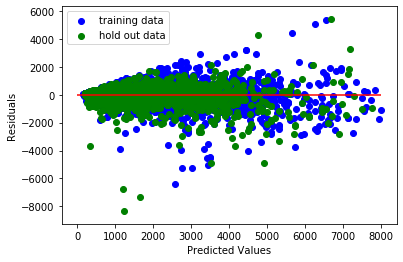

In [ ]:
#Here the residuals in train and test parts are plotted, and we can see that
#most of the residuals are bounded around 0.
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gsknn.predict(X_train),gsknn.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gsknn.predict(X_test),gsknn.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=8000, color="r")
plt.show()

In [ ]:
#The best number of neighbors is printed
gsknn.best_params_

{'n_neighbors': 7, 'p': 1}

In [ ]:
#The train and test characteristic errors are printed
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gsknn.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gsknn.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gsknn.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gsknn.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gsknn.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gsknn.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gsknn.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gsknn.predict(X_test))))

MAE train:  240.77895250439775
MSE train:  189707.03245389365
RMSE train:  435.5537078867469
r2:  0.9300200515670868
MAE test:  282.85637460397464
MSE test:  269216.5814915815
RMSE test:  518.8608498350801
r2:  0.9031469584230214


We can sed the errors in train and test don't change a lot, and remain relatively low. Also r2 indicates that most of the variance is explained by the model predictions, and it doesn't change a lot between test and train. This indicate that the model should perform well.

## REFITTING WITH WHOLE DATASET

In [ ]:
regressor = KNeighborsRegressor(n_neighbors=7, p=1)

In [ ]:
regressor = regressor.fit(Xfin,y)

In [ ]:
y_pred = regressor.predict(Xfin)

In [ ]:
from sklearn import metrics

print("MAE full: ", metrics.mean_absolute_error(y, y_pred)) 
print("MSE full: ",metrics.mean_squared_error(y, y_pred))
print("RMSE full: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("r2 full: ",np.sqrt(metrics.r2_score(y, y_pred)))

MAE full:  230.10449532306495
MSE full:  179308.19634186287
RMSE full:  423.4479854030042
r2 full:  0.9348069091029417


After the refitting on the whole dataset we don't see a significant change in the errors, and this is another sign that could indicate a good performance on other testing datasets.